# Outliers and Charts

### Table of contents:
[Introduction](#intro)\
\
[1. Data overview](#overview)

[2. Outliers](#outliers)
> [2.1. Outliers in price](#outliers_price)<br>
> [2.2. Outliers in model year](#outliers_year)

[4. Final results](#final)

## Introduction <a id='intro'></a>

The goal is to visualize outliers using charts and clean the data for building a web app.

## 1. Data overview <a id='overview'></a>

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_chart=pd.read_csv('../cleaned_data.csv')

In [3]:
df_chart.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Using describe() method to get an overview of the numerical data, to understand the distribution of each column and to check for outliers.

In [4]:
df_chart.describe().T

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.464920,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,51525.0,2009.796672,6.099245,1908.0,2007.0,2011.0,2014.0,2019.0
cylinders,51525.0,6.121067,1.657457,3.0,4.0,6.0,8.0,12.0
odometer,51524.0,115204.967656,62084.290072,0.0,73500.0,114054.0,152773.0,990000.0
is_4wd,51525.0,0.496303,0.499991,0.0,0.0,0.0,1.0,1.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.0,53.0,271.0


#### __Conclusions:__ 
- The following columns have outliers: price, model_year.
- The 'price' column shows outliers at both the lower and upper ends of the range.
- The 'model_year' column contains outliers only at the lower boundary, since the minimum value distincts a lot from the first quartile.

## 2. Outliers <a id='outliers'></a>

### 2.1. Outliers in price <a id='outliers_price'></a>

#### 2.1.1. Visualizing price outliers using box plot

<Axes: >

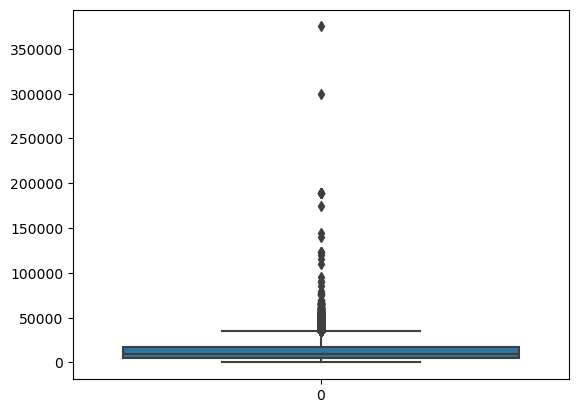

In [5]:
sns.boxplot(df_chart['price'])

__Conclusion:__ in the above graph the values above 100000 are acting as outliers.

#### 2.1.2. Analyzing price distribution to find the precise thresholds for outliers

*Lower boundary:* examining the price distribution to identify the threshold below which outliers start to emerge.

In [6]:
p15_price=df_chart['price'].quantile(0.15)
p10_price=df_chart['price'].quantile(0.10)
p5_price=df_chart['price'].quantile(0.05)
p3_price=df_chart['price'].quantile(0.03)
p2_price=df_chart['price'].quantile(0.02)

print(f'15% of the data falls under the price: {int(p15_price)}\n\
10% of the data falls under the price: {int(p10_price)}\n\
5% of the data falls under the price: {int(p5_price)}\n\
3% of the data falls under the price: {int(p3_price)}\n\
2% of the data falls under the price: {int(p2_price)}')

15% of the data falls under the price: 3800
10% of the data falls under the price: 2995
5% of the data falls under the price: 1950
3% of the data falls under the price: 1000
2% of the data falls under the price: 371


__Conclusion:__ the prices below 1000 can be considered outliers.

*Upper boundary:* examining the price distribution to identify the upper threshold for outliers.

In [7]:
p80_price=df_chart['price'].quantile(0.8)
p85_price=df_chart['price'].quantile(0.85)
p90_price=df_chart['price'].quantile(0.9)
p95_price=df_chart['price'].quantile(0.95)
p98_price=df_chart['price'].quantile(0.98)
p99_price=df_chart['price'].quantile(0.99)

print(f'80% of the data falls under the price: {int(p80_price)}\n\
85% of the data falls under the price: {int(p85_price)}\n\
90% of the data falls under the price: {int(p90_price)}\n\
95% of the data falls under the price: {int(p95_price)}\n\
98% of the data falls under the price: {int(p98_price)}\n\
99% of the data falls under the price: {int(p99_price)}')

80% of the data falls under the price: 18950
85% of the data falls under the price: 21900
90% of the data falls under the price: 25200
95% of the data falls under the price: 30300
98% of the data falls under the price: 37995
99% of the data falls under the price: 43995


__Conclusions:__
- 99% of the cars are sold at the price less than or equal to 43995.
- Mathematically the prices above 44000 can be considered outliers. Graphically the values above 100000 are acting as outliers.
- The upper boundary for outliers is chosen to be above 100000.

__Assumption:__ prices between 44000 and 100000 are considered to be reasonable for brand-new and vintage cars.

#### 2.1.3. Removing lower price outliers

Using the drop() method to remove price outliers.
- (df_chart['price']<1000]) & (df_chart['price']>100000) are the conditions to drop the rows.
- df_chart[].index selects the index of rows that satisfy the conditions.
- inplace=True performs the drop operation in the same dataframe instead of creating a new one.

In [8]:
lower_index=df_chart[df_chart['price']<1000].index
df_chart.drop(lower_index, inplace=True)
df_chart.sort_values('price').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2606,1000,2009.0,honda civic,fair,4.0,gas,143660.0,automatic,sedan,white,0.0,2019-02-25,29
39625,1000,2009.0,ford explorer,fair,6.0,gas,200000.0,automatic,SUV,green,1.0,2019-03-31,93
43023,1000,2016.0,ford f-150,excellent,8.0,gas,16000.0,automatic,truck,red,1.0,2018-11-04,13
42965,1000,2012.0,jeep liberty,like new,6.0,gas,126000.0,automatic,SUV,silver,1.0,2018-10-25,58
27510,1000,1996.0,jeep grand cherokee,fair,8.0,gas,318000.0,automatic,SUV,white,1.0,2018-08-28,20
38140,1000,1986.0,ford f-250,fair,8.0,gas,100000.0,manual,pickup,NaN,0.0,2018-06-28,58
24388,1000,2001.0,ford f-150,good,6.0,gas,360000.0,manual,truck,white,0.0,2018-05-02,29
15169,1000,2001.0,honda accord,good,4.0,gas,290000.0,automatic,sedan,white,0.0,2019-03-06,55
7551,1000,2009.0,toyota camry,good,4.0,gas,246800.0,automatic,sedan,NaN,0.0,2018-08-30,14
3934,1000,1997.0,toyota camry le,fair,4.0,gas,260000.0,automatic,sedan,green,0.0,2018-09-24,41


#### 2.1.4. Removing upper price outliers

In [9]:
upper_index=df_chart[df_chart['price']>100000].index
df_chart.drop(upper_index, inplace=True)
df_chart.sort_values('price', ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
31626,94955,2008.0,toyota sienna,like new,6.0,gas,145279.0,automatic,mini-van,silver,0.0,2019-04-03,34
4113,90577,2018.0,ford f-150,excellent,6.0,gas,6448.0,automatic,truck,black,1.0,2018-07-29,19
37904,90000,2018.0,ford f-350 sd,excellent,8.0,diesel,7536.0,automatic,truck,white,1.0,2018-08-15,55
7113,84900,2019.0,ford f350,new,8.0,diesel,9000.0,automatic,pickup,white,1.0,2019-03-26,7
1326,79900,2008.0,ford f350,like new,8.0,diesel,10060.0,automatic,pickup,white,1.0,2018-07-16,22
12485,78000,2009.0,honda odyssey,good,6.0,gas,126567.0,automatic,van,blue,0.0,2018-11-14,28
50664,76995,2018.0,cadillac escalade,excellent,8.0,gas,4500.0,other,SUV,white,1.0,2018-10-25,21
23774,76500,2015.0,chevrolet silverado 2500hd,like new,8.0,diesel,8989.0,automatic,pickup,white,1.0,2019-02-23,31
2790,76000,2016.0,chevrolet corvette,new,8.0,gas,1700.0,automatic,convertible,white,0.0,2018-07-15,79
28007,75000,2019.0,cadillac escalade,like new,8.0,gas,9000.0,automatic,SUV,red,1.0,2019-03-28,40


#### __Conclusions:__
- The price outliers are removed.
- The price range is now between 1000 and 100000.

### 2.2. Outliers in model year <a id='outliers_year'></a>

#### 2.2.1. Visualizing model year outliers using box plot

<Axes: >

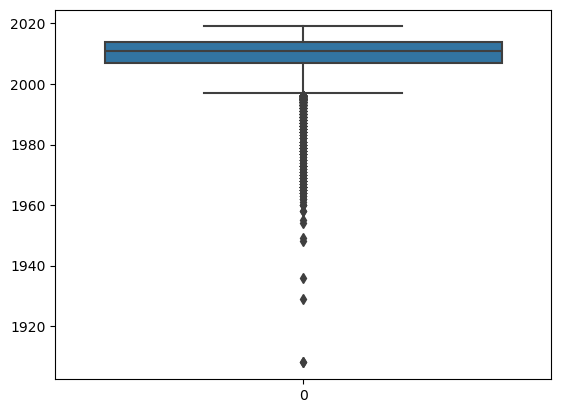

In [10]:
sns.boxplot(df_chart['model_year'])

__Conclusion:__ in the above graph the values below 1960 are acting as outliers.

#### 2.2.2. Analyzing model year distribution to find the precise threshold for outliers

Calculating how often each model year appears in the dataset.

In [11]:
frequency=df_chart.groupby('model_year')['model_year'].count()
frequency_percent=(frequency/df_chart['model_year'].count())*100
frequency_percent.sort_values()

model_year
1929.0    0.001996
1936.0    0.001996
1948.0    0.001996
1949.0    0.001996
1954.0    0.001996
            ...   
2008.0    6.787881
2014.0    6.851748
2013.0    7.825722
2011.0    7.975411
2012.0    7.989382
Name: model_year, Length: 69, dtype: float64

Identifying years that occur in less than 0.1% of cases to see if this value can be the boundary for outliers.

In [12]:
frequency_percent[frequency_percent<0.1].sort_values()

model_year
1929.0    0.001996
1936.0    0.001996
1948.0    0.001996
1949.0    0.001996
1954.0    0.001996
1955.0    0.001996
1961.0    0.001996
1908.0    0.003992
1958.0    0.003992
1976.0    0.005988
1963.0    0.005988
1960.0    0.005988
1962.0    0.005988
1974.0    0.007983
1972.0    0.009979
1983.0    0.013971
1975.0    0.013971
1971.0    0.013971
1964.0    0.013971
1967.0    0.013971
1982.0    0.017963
1970.0    0.019958
1981.0    0.019958
1969.0    0.019958
1965.0    0.019958
1980.0    0.023950
1978.0    0.025946
1977.0    0.025946
1973.0    0.029938
1968.0    0.031934
1985.0    0.033929
1979.0    0.037921
1984.0    0.039917
1966.0    0.043909
2010.5    0.045905
1987.0    0.059875
1986.0    0.071851
1988.0    0.073846
1991.0    0.095801
Name: model_year, dtype: float64

Checking how many cars are there from the 1991 year.

In [13]:
year1991=df_chart[df_chart['model_year']==1991].count()
year1991

price           48
model_year      48
model           48
condition       48
cylinders       48
fuel            48
odometer        48
transmission    48
type            48
paint_color     40
is_4wd          48
date_posted     48
days_listed     48
dtype: int64

__Conclusions:__
- The number of cars from the 1991 year can be considered significant.
- The boundary for outliers should be lower.

Identifying years that occur in less than 0.01% of cases to see if this value can be the boundary for outliers.

In [14]:
frequency_percent[frequency_percent<0.01].sort_values()

model_year
1929.0    0.001996
1936.0    0.001996
1948.0    0.001996
1949.0    0.001996
1954.0    0.001996
1955.0    0.001996
1961.0    0.001996
1908.0    0.003992
1958.0    0.003992
1960.0    0.005988
1962.0    0.005988
1963.0    0.005988
1976.0    0.005988
1974.0    0.007983
1972.0    0.009979
Name: model_year, dtype: float64

Checking how many cars are there from the 1972 year.

In [15]:
year1972=df_chart[df_chart['model_year']==1972].count()
year1972

price           5
model_year      5
model           5
condition       5
cylinders       5
fuel            5
odometer        5
transmission    5
type            5
paint_color     4
is_4wd          5
date_posted     5
days_listed     5
dtype: int64

__Conclusion:__ model years that appear in the dataset in less than 0.01% of the cases can be considered outliers.

In [16]:
v=list(frequency_percent[frequency_percent<0.01])
v

[0.003991697269679068,
 0.001995848634839534,
 0.001995848634839534,
 0.001995848634839534,
 0.001995848634839534,
 0.001995848634839534,
 0.001995848634839534,
 0.003991697269679068,
 0.005987545904518601,
 0.001995848634839534,
 0.005987545904518601,
 0.005987545904518601,
 0.009979243174197669,
 0.007983394539358136,
 0.005987545904518601]

In [36]:
l1=df_chart['model_year'].value_counts(normalize=True).reset_index()
l1

,model_year,proportion
0,2012.0,0.079894
1,2011.0,0.079754
2,2013.0,0.078257
3,2014.0,0.068517
4,2008.0,0.067879
...,...,...
64,1955.0,0.000020
65,1961.0,0.000020
66,1936.0,0.000020
67,1949.0,0.000020


In [61]:
less=l1[l1['proportion']<0.01]
less

,model_year,proportion
20,1998.0,0.007125
21,2019.0,0.006407
22,1997.0,0.006207
23,1995.0,0.003533
24,1996.0,0.003473
25,1994.0,0.002295
26,1993.0,0.001976
27,1989.0,0.001138
28,1990.0,0.001118
29,1992.0,0.001058


In [69]:
m=list(less['model_year'])
m

[1998.0,
 2019.0,
 1997.0,
 1995.0,
 1996.0,
 1994.0,
 1993.0,
 1989.0,
 1990.0,
 1992.0,
 1991.0,
 1988.0,
 1986.0,
 1987.0,
 2010.5,
 1966.0,
 1984.0,
 1979.0,
 1985.0,
 1968.0,
 1973.0,
 1978.0,
 1977.0,
 1980.0,
 1969.0,
 1970.0,
 1981.0,
 1965.0,
 1982.0,
 1971.0,
 1975.0,
 1964.0,
 1983.0,
 1967.0,
 1972.0,
 1974.0,
 1960.0,
 1962.0,
 1963.0,
 1976.0,
 1908.0,
 1958.0,
 1954.0,
 1948.0,
 1955.0,
 1961.0,
 1936.0,
 1949.0,
 1929.0]

In [70]:
mask = df_chart['model_year'].isin(m)
low_years = df_chart[mask]
low_years
#n=df_chart[model_year.isin(m)]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
63,30000,1966.0,ford mustang,excellent,6.0,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
73,1900,1994.0,jeep grand cherokee laredo,good,6.0,gas,207.0,automatic,SUV,grey,1.0,2018-07-27,9
78,23800,2019.0,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,1.0,2019-02-28,30
106,21500,2019.0,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,0.0,2019-03-29,70
112,22500,2019.0,nissan frontier crew cab sv,good,6.0,gas,24209.0,other,pickup,NaN,1.0,2019-03-03,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51447,33990,2019.0,ram 1500,excellent,8.0,gas,9000.0,automatic,truck,white,1.0,2019-01-25,36
51449,4500,1995.0,ram 3500,excellent,10.0,gas,163000.0,automatic,pickup,black,1.0,2018-05-14,75
51458,2000,1993.0,jeep grand cherokee laredo,fair,6.0,gas,141669.0,automatic,SUV,green,1.0,2019-02-16,25
51462,3500,1998.0,toyota 4runner,good,6.0,gas,170592.0,automatic,SUV,brown,1.0,2018-08-15,9


Removing outliers using the box plot

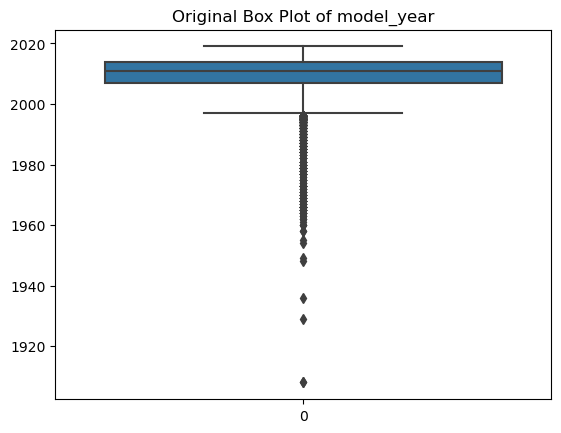

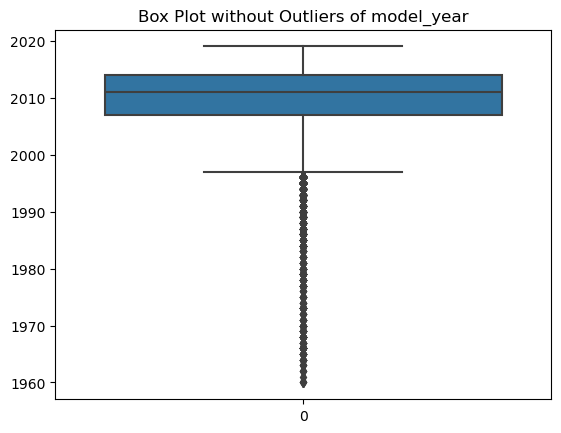

In [28]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] >= threshold]
 
    sns.boxplot(removed_outliers[column].reset_index()['model_year'])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 1960
 
no_outliers = removal_box_plot(df_chart, 'model_year', threshold_value)

### Visualizing and Removing Outliers Using Scatterplot

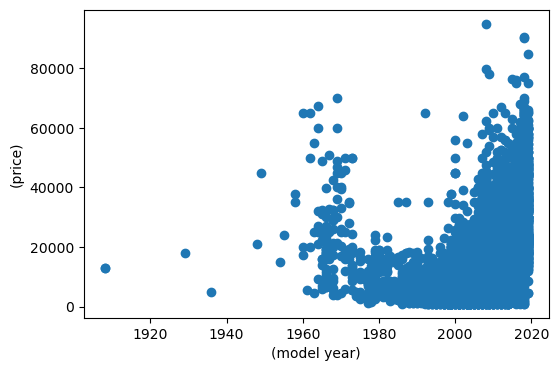

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_chart['model_year'], df_chart['price'])
ax.set_xlabel('(model year)')
ax.set_ylabel('(price)')
plt.show()

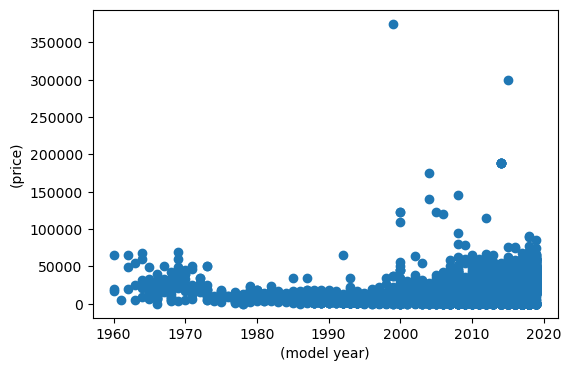

In [ ]:
outlier_indices = np.where(df_chart['model_year'] < 1960)
 
no_outliers = df_chart.drop(outlier_indices[0])
 
# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['model_year'], no_outliers['price'])
ax_no_outliers.set_xlabel('(model year)')
ax_no_outliers.set_ylabel('(price)')
plt.show()

## 4. Final results <a id='final'></a>

Price and model year outliers are removed to make the charts more informative.

__Conclusion:__ the dataset is cleaned for further implementation.